In [1]:
# 경고 메세지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold
from sklearn.model_selection import KFold           # 랜덤하게 섞어서 자를 수도 있고, 순서대로 자를 수도 있음
from sklearn.model_selection import StratifiedKFold # 결과 데이터의 비율이 최대한 균등하게 들어갈 수 있도록!

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family']='Malgun Gothic'
# 맥용 plt.rcParams['font.family']='AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 랜덤 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 입력
column_list = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']
df1 = pd.read_csv('../../data/iris.csv', names=column_list)
df1.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


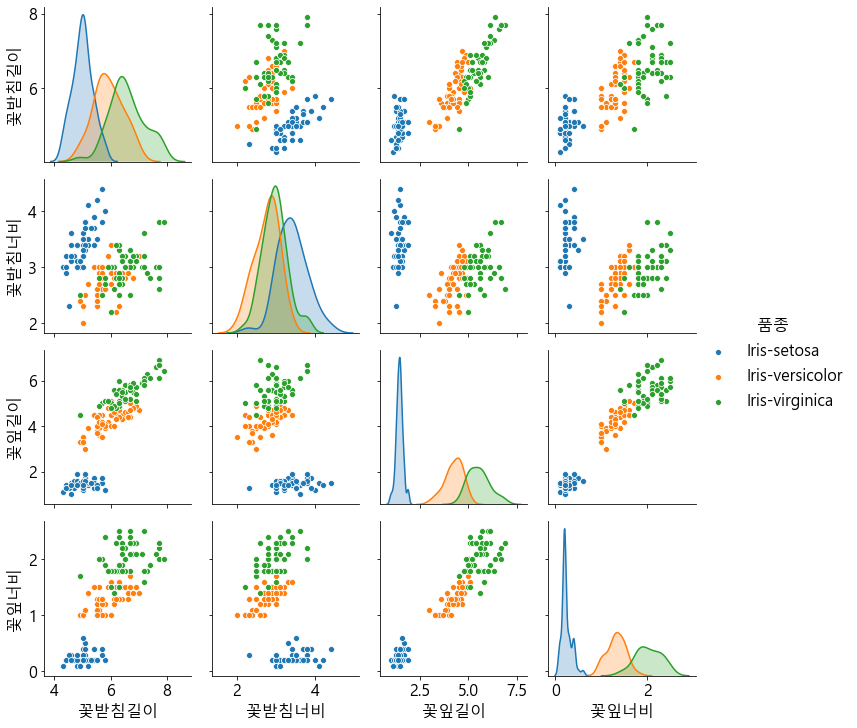

In [4]:
# pairplot

sns.pairplot(df1, hue='품종')
plt.show()

In [5]:
# 입력과 결과로 나눈다.
X = df1.drop('품종', axis=1)
Y = df1['품종']

display(X)
display(Y)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 품종, Length: 150, dtype: object

In [6]:
# 문자열 인코딩

encoder1 = LabelEncoder()
encoder1.fit(Y)
Y2 = encoder1.transform(Y)
Y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# 핫-윈 인코딩
y_encoded = to_categorical(Y2)
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
# 모델 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
# 다중 분류의 출력층의 노드 개수는 원핫인코딩을 사용하기 때문에 결과데이터 종류의 개수로 설정해야 한다
# 이진 분류일때는 model.add(Dense(1, activation='sigmoid' ))
model.add(Dense(3, activation='softmax')) # 다중분류라서 소프트맥스함수

In [9]:
# 모델 컴파일
# 다중 분류일 경우 손실함수는 categorical_crossentropy 를 사용한다

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 이진 분류
- 출력층의 노드를 1로 설정한다.
- 출력층의 활성 함수는 sigmoid로 설정한다.
- compile 시 손실함수는 binary_crossentropy로 설정한다.

#### 다중 분류
- 결과데이터를 핫-윈 인코더로 인코딩해준다.
- 출력층의 노드는 결과데이터의 종류수로 설정한다.
- 출력층의 활성 함수는 softmax로 설정한다.
- compile 시 손실함수는 categorical_crossentropy로 설정한다.

In [10]:
# 학습
model.fit(X, y_encoded, epochs=50, batch_size=10)

Epoch 1/50
15/15 [==============================] - 1s 3ms/step - loss: 1.9490 - accuracy: 0.3300
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 1.6882 - accuracy: 0.3257
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 1.3729 - accuracy: 0.3218
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 1.2700 - accuracy: 0.2559
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 1.0555 - accuracy: 0.3518
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 1.0022 - accuracy: 0.3194
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9510 - accuracy: 0.2738
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.8996 - accuracy: 0.5940
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.8387 - accuracy: 0.6809
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.6720
Epoch 11/50
15/15 [

In [11]:
# 예측 정확도
# 주어진 입력 데이터를 통해 예측 결과를 도출하고 설정한 결과 데이터와 비교해서 얼마나 일치하는지 확인한다

print(f'정확도 : {model.evaluate(X, y_encoded)[1]}')

5/5 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.9733
정확도 : 0.9733333587646484


In [13]:
# 2021년 이후 제거 예정
# pred = model.predict_classes(X)
# pred

pred = np.argmax(model.predict(X), axis=-1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [14]:
# 결과 디코딩 : 원래 문자열로 복원

y_pred = encoder1.inverse_transform(pred)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [16]:
# 평가
score = accuracy_score(Y, y_pred)
score

0.9733333333333334